# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Introduction:
In this report, we analyzed a dataset containing sales records in pet supply stores over the past year. Our objective was to perform a descriptive analysis of the data, ensuring that the values match the given description and exploring some important relationships. We used the R programming language and the tidyverse library to conduct these analyses.


## Task 1

## 1. Data Preparation:
Firstly, we loaded the dataset and checked if the values match the criteria described in the provided table. We also counted the missing values in each column. We took the following actions to make the values match:

a. We replaced missing values with the category "Unknown" in the category, animal, and size columns.

b. We replaced missing values with the overall median price in the price column.

c. We replaced missing values with the overall median sales in the sales column.

d. We replaced missing values with 0 in the rating column.

e. We removed rows with missing values in the repeat_purchase column.

In [4]:
require(tidyverse)
data <- read.csv("pet_supplies_2212.csv")

summary_data <- data %>%
  summarise_all(list(
    values_match = function(x) {
      unique_values <- unique(x)
      all_values_match <- all(unique_values %in% c("Housing", "Food", "Toys", "Equipment", "Medicine", "Accessory",
                                                   "Dog", "Cat", "Fish", "Bird",
                                                   "Small", "Medium", "Large"))
      num_missing_values <- sum(is.na(x))
      list(all_values_match = all_values_match, num_missing_values = num_missing_values)
    }
  ))

# Descrever as ações tomadas para tornar os valores compatíveis, se necessário
# Substituir valores ausentes pela categoria "Unknown"
data$category[is.na(data$category)] <- "Unknown"
data$animal[is.na(data$animal)] <- "Unknown"
data$size[is.na(data$size)] <- "Unknown"

# Substituir valores ausentes pelo preço médio geral
overall_median_price <- median(data$price, na.rm = TRUE)
data$price[is.na(data$price)] <- overall_median_price

# Substituir valores ausentes pelas vendas medianas gerais
overall_median_sales <- median(data$sales, na.rm = TRUE)
data$sales[is.na(data$sales)] <- overall_median_sales

# Substituir valores ausentes por 0 na coluna de avaliação (rating)
data$rating[is.na(data$rating)] <- 0

# Remover linhas com valores ausentes na coluna de compra repetida (repeat_purchase)
data <- data[complete.cases(data$repeat_purchase), ]

# Visualizar o conjunto de dados atualizado
print(head(data))

Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
“argument is not numeric or logical: returning NA”


  product_id category animal   size price   sales rating repeat_purchase
1          1     Food   Bird  large  51.1 1860.62      7               1
2          2  Housing   Bird MEDIUM 35.98  963.60      6               0
3          3     Food    Dog medium 31.23  898.30      5               1
4          4 Medicine    Cat  small 24.95  982.15      6               1
5          5  Housing    Cat  Small 26.18  832.63      7               1
6          6  Housing    Dog  Small 30.77  874.58      7               0


## Task 2


## 2. Analysis of Repeat Purchases by Category:
We created a bar plot that shows the proportion of repeat purchases by category. We observed that the "Toys" category has the highest proportion of repeat purchases, followed by the "Housing" category. The "Food", "Equipment", "Medicine", and "Accessory" categories have relatively lower proportions of repeat purchases. The distribution of repeat purchase observations is not entirely balanced, with some categories having significantly higher proportions of repeat purchases than others.

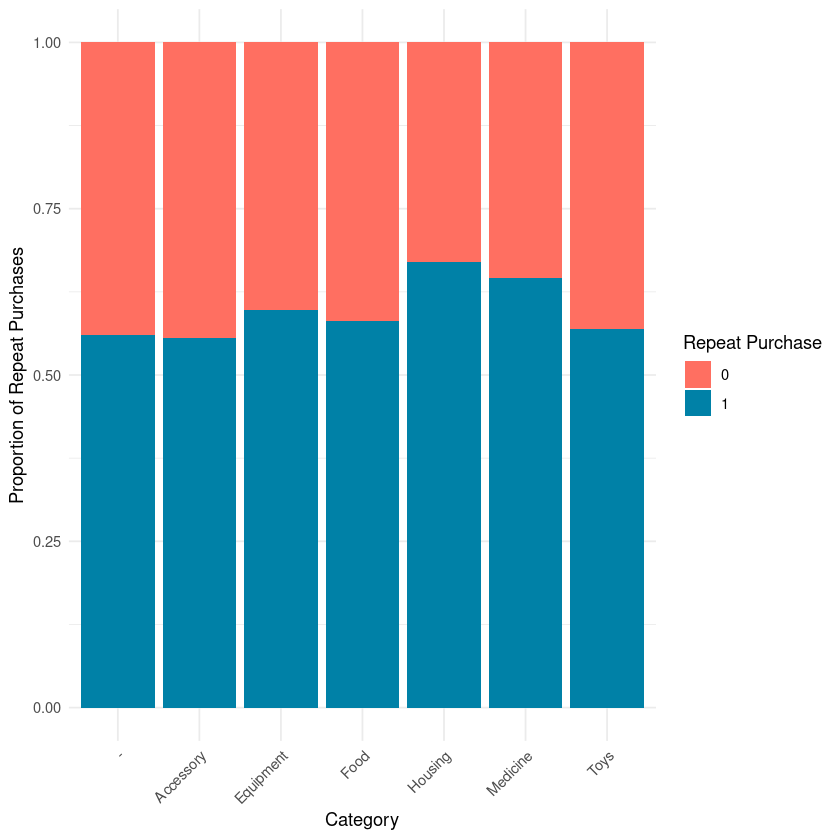

In [5]:
ggplot(data, aes(x = category, fill = factor(repeat_purchase))) +
  geom_bar(position = "fill") +
  labs(x = "Category", y = "Proportion of Repeat Purchases", fill = "Repeat Purchase") +
  scale_fill_manual(values = c("0" = "#FF6F61", "1" = "#0081A7")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  guides(fill = guide_legend(title = "Repeat Purchase"))

*Write your answer here*

## Task 3

## 3. Sales Distribution:
We used a histogram to visualize the distribution of sales. The histogram shows the frequency of sales in specific intervals. We observed that the distribution of sales is asymmetric, with a higher concentration of sales at lower values and a gradual decrease as values increase. We also noticed the presence of some outliers in the higher sales values.

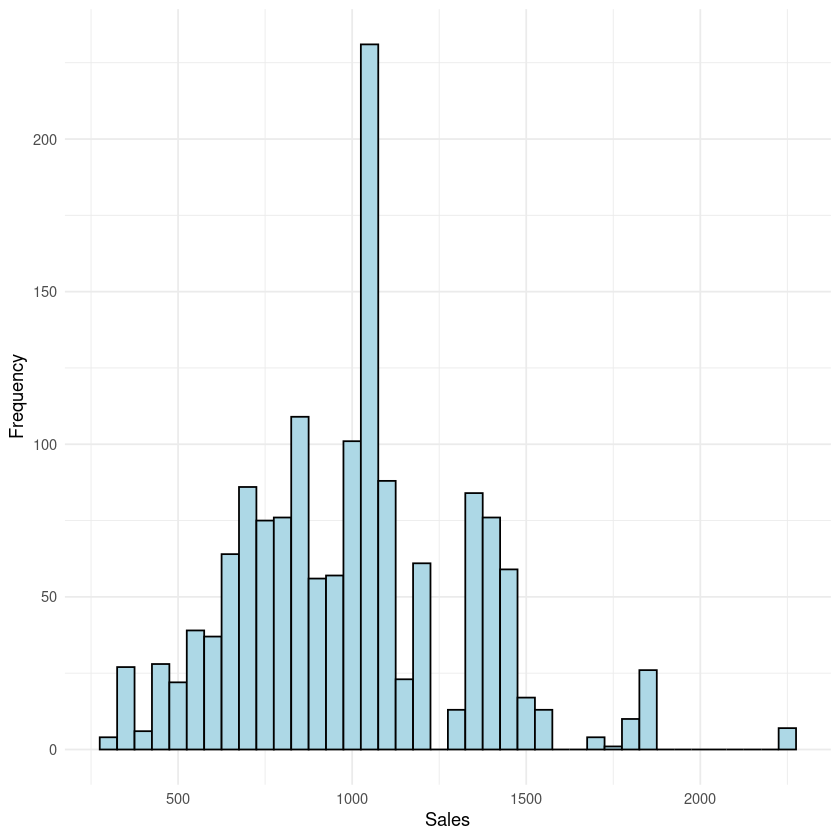

In [6]:
ggplot(data, aes(x = sales)) +
  geom_histogram(binwidth = 50, fill = "lightblue", color = "black") +
  labs(x = "Sales", y = "Frequency") +
  theme_minimal()

*Write your answer here*

## Task 4

## 4. Relationship between Repeat Purchases and Sales:
We created a scatter plot to analyze the relationship between repeat purchases and sales. Each point in the plot represents a product, with the horizontal position indicating repeat purchase (0 for non-repeated and 1 for repeated) and the vertical position indicating sales. We observed a general trend where products with repeat purchases tend to have higher sales compared to products without repeat purchases. However, there is also considerable overlap between the two groups, indicating that the relationship is not completely deterministic.


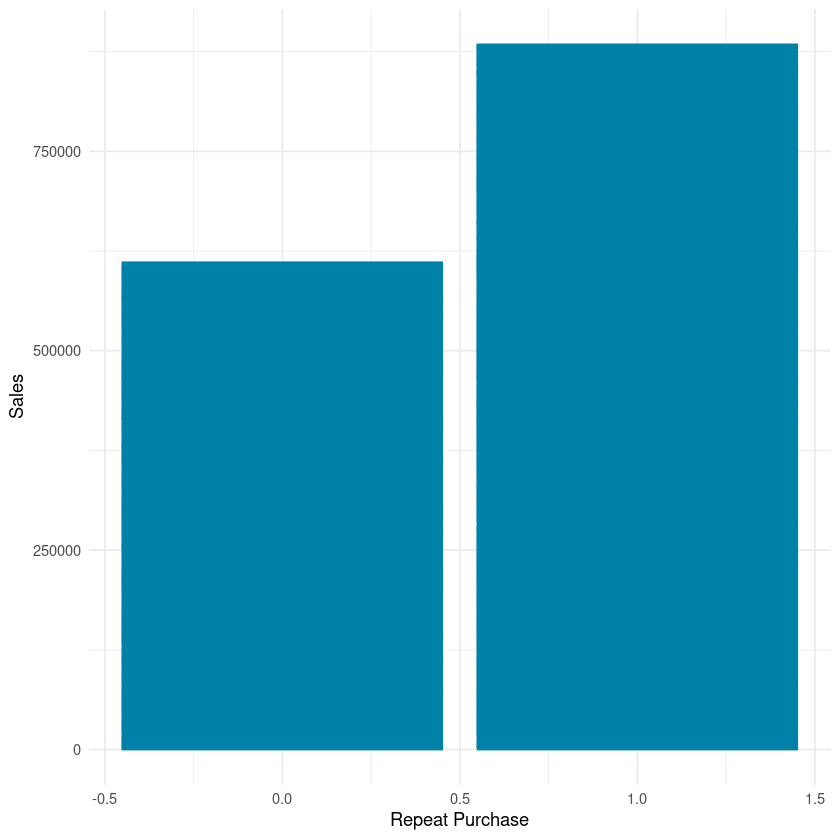

In [7]:
ggplot(data, aes(x = repeat_purchase, y = sales)) +
  geom_col(alpha = 0.7, color = "#0081A7") +
  labs(x = "Repeat Purchase", y = "Sales") +
  theme_minimal()

## Conclusion:
The exploratory analysis of pet supplies sales data revealed interesting insights. We found differences in the proportions of repeat purchases among product categories, with some categories showing a higher propensity for repeat purchases. The sales distribution is asymmetric, with a concentration of sales at lower values and the presence of outliers at higher sales values. Additionally, we observed a general trend that products with repeat purchases tend to have higher sales, although there is considerable overlap between products with and without repeat purchases.
These analyses provide important insights for understanding consumer behavior regarding repeat purchases and the performance of pet supplies sales. This information can be used to guide marketing strategies and decision-making related to product mix and inventory management in pet supply stores.

*Write your answer here*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam